In [1]:
%matplotlib inline
from preamble import *

## Representing Data and Engineering Features

### Categorical Variables

\begin{align*}
\end{align*}

In [3]:
import mglearn
import pandas as pd

#### One-Hot-Encoding (Dummy variables)

In [4]:
import os
# The file has no headers naming the columns, so we pass header=None
# and provide the column names explicitly in "names"
adult_path = os.path.join(mglearn.datasets.DATA_PATH, "adult.data")
data = pd.read_csv(
    adult_path, header=None, index_col=False,
    names=['age', 'workclass', 'fnlwgt', 'education',  'education-num',
           'marital-status', 'occupation', 'relationship', 'race', 'gender',
           'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
           'income'])
# For illustration purposes, we only select some of the columns
data = data[['age', 'workclass', 'education', 'gender', 'hours-per-week',
             'occupation', 'income']]
# IPython.display allows nice output formatting within the Jupyter notebook
display(data.head())

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


##### Checking string-encoded categorical data

In [5]:
print(data.gender.value_counts())

gender
Male      21790
Female    10771
Name: count, dtype: int64


In [6]:
print("Original features:\n", list(data.columns), "\n")
data_dummies = pd.get_dummies(data)
print("Features after get_dummies:\n", list(data_dummies.columns))

Original features:
 ['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income'] 

Features after get_dummies:
 ['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'gender_ Female', 'gender_ Male', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-i

In [5]:
display(data_dummies.head())

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,...,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,39,40,0,0,...,0,0,1,0
1,50,13,0,0,...,0,0,1,0
2,38,40,0,0,...,0,0,1,0
3,53,40,0,0,...,0,0,1,0
4,28,40,0,0,...,0,0,1,0


In [9]:
pd.get_dummies(data['gender']).head()

,Female,Male
0,False,True
1,False,True
2,False,True
3,False,True
4,True,False


In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
ohe.fit()
ohe.transform()
# ohe.fit_transform()

In [6]:
features = data_dummies.loc[:, 'age':'occupation_ Transport-moving']
# Extract NumPy arrays
X = features.values
y = data_dummies['income_ >50K'].values
print("X.shape: {}  y.shape: {}".format(X.shape, y.shape))

X.shape: (32561, 44)  y.shape: (32561,)


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print("Test score: {:.2f}".format(logreg.score(X_test, y_test)))

Test score: 0.81


c:\users\t3kci\checkout\scikit-learn\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


#### Numbers Can Encode Categoricals

In [14]:
# create a DataFrame with an integer feature and a categorical string feature
demo_df = pd.DataFrame({'Integer Feature': [0, 1, 2, 1],
                        'Categorical Feature': ['socks', 'fox', 'socks', 'box']})
display(demo_df)

,Integer Feature,Categorical Feature
0,0,socks
1,1,fox
2,2,socks
3,1,box


In [18]:
display(pd.get_dummies(demo_df))

,Integer Feature,Categorical Feature_box,Categorical Feature_fox,Categorical Feature_socks
0,0,False,False,True
1,1,False,True,False
2,2,False,False,True
3,1,True,False,False


In [26]:
demo_df['Integer Feature'] = demo_df['Integer Feature'].astype(str)
display(pd.get_dummies(demo_df, columns=['Integer Feature', 'Categorical Feature']))

,Integer Feature_0,Integer Feature_1,Integer Feature_2,Categorical Feature_box,Categorical Feature_fox,Categorical Feature_socks
0,True,False,False,False,False,True
1,False,True,False,False,True,False
2,False,False,True,False,False,True
3,False,True,False,True,False,False


### OneHotEncoder and ColumnTransformer: Categorical Variables with scikit-learn

### 🎯 ColumnTransformer: 혼합 데이터 타입 처리하기

**실전 상황:**
대부분의 실제 데이터셋은 **다양한 타입의 컬럼**을 포함합니다:
- 수치형: 나이, 소득, 근무시간
- 범주형: 직업, 교육수준, 성별

**pandas의 get_dummies()와 차이:**
| 방법 | 장점 | 단점 |
|------|------|------|
| `pd.get_dummies()` | 간단, 빠름 | train/test 일관성 보장 어려움 |
| `ColumnTransformer` | 파이프라인 통합, 일관성 | 설정이 복잡 |

**ColumnTransformer의 핵심 아이디어:**
```python
ct = ColumnTransformer([
    ("수치형 처리", StandardScaler(), ['age', 'hours']),
    ("범주형 처리", OneHotEncoder(), ['occupation'])
])
```
→ 컬럼별로 **다른 변환** 적용 후 자동으로 **결합**

**파이프라인 통합의 이점:**
1. `fit`과 `transform`의 일관된 동작
2. 교차 검증에서 데이터 누수 방지
3. 새 데이터에 동일 변환 자동 적용

### scikit-learn API 업데이트 안내

> **`sparse` 매개변수 이름 변경**
>
> scikit-learn 1.2 버전부터 `OneHotEncoder`의 `sparse` 매개변수가 `sparse_output`으로
> 이름이 변경되었습니다. 이는 반환되는 데이터 형식을 더 명확하게 표현하기 위한 변경입니다.
>
> - **이전 버전**: `OneHotEncoder(sparse=False)`
> - **현재 버전**: `OneHotEncoder(sparse_output=False)`
>
> `sparse_output=True`(기본값)일 경우 희소 행렬(sparse matrix)을, `False`일 경우
> 일반 NumPy 밀집 배열(dense array)을 반환합니다. 희소 행렬은 메모리를 절약하지만,
> 일부 연산에서는 밀집 배열이 더 편리합니다.
>
> 📚 [공식 문서](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)

In [29]:
from sklearn.preprocessing import OneHotEncoder
# Setting sparse_output=False means OneHotEncode will return a numpy array, not a sparse matrix
ohe = OneHotEncoder(sparse_output=False)
ohe.set_output(transform='pandas')      # pandas -> df로 출력
# ohe.fit_transform(demo_df)
df2 = ohe.fit_transform(demo_df[['Categorical Feature']])
df2

,Categorical Feature_box,Categorical Feature_fox,Categorical Feature_socks
0,0.0,0.0,1.0
1,0.0,1.0,0.0
2,0.0,0.0,1.0
3,1.0,0.0,0.0


In [32]:
demo_df.join(df2)

,Integer Feature,Categorical Feature,Categorical Feature_box,Categorical Feature_fox,Categorical Feature_socks
0,0,socks,0.0,0.0,1.0
1,1,fox,0.0,1.0,0.0
2,2,socks,0.0,0.0,1.0
3,1,box,1.0,0.0,0.0


In [37]:
from sklearn.compose import ColumnTransformer

ctf = ColumnTransformer([
    ('ohe', OneHotEncoder(), ['Categorical Feature'])
    ])
ctf.fit_transform(demo_df)

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

### scikit-learn API 업데이트 안내

> **`get_feature_names()` 메서드 변경**
>
> scikit-learn 1.0 버전부터 `get_feature_names()` 메서드가 `get_feature_names_out()`으로
> 대체되었습니다. 새로운 메서드는 입력 특성 이름을 선택적으로 받아 더 정확한 출력 특성
> 이름을 생성할 수 있습니다.
>
> - **이전 버전**: `encoder.get_feature_names()`
> - **현재 버전**: `encoder.get_feature_names_out()`
>
> 이 변경은 scikit-learn의 전체 API를 일관성 있게 만들기 위한 노력의 일환입니다.
> `_out` 접미사는 변환기(transformer)의 출력 특성 이름을 반환함을 명확히 합니다.
>
> 📚 [공식 문서](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder.get_feature_names_out)

In [27]:
print(ohe.get_feature_names_out())

['Categorical Feature_box' 'Categorical Feature_fox'
 'Categorical Feature_socks']


In [28]:
display(data.head())

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


In [42]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

ct = ColumnTransformer(
    [("scaling", StandardScaler(), ['age', 'hours-per-week']),
     ("onehot", OneHotEncoder(sparse_output=False), ['workclass', 'education', 'gender', 'occupation'])])

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# get all columns apart from income for the features
data_features = data.drop("income", axis=1)
# split dataframe and income
X_train, X_test, y_train, y_test = train_test_split(
    data_features, data.income, random_state=0)

ct.fit(X_train)
X_train_trans = ct.transform(X_train)
print(X_train_trans.shape)

(24420, 44)


In [40]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_trans, y_train)

X_test_trans = ct.transform(X_test)
print("Test score: {:.2f}".format(logreg.score(X_test_trans, y_test)))

Test score: 0.81


### 📊 결과 분석: ColumnTransformer + LogisticRegression

**파이프라인 구성:**
```
원본 데이터 (혼합 타입)
    ↓
ColumnTransformer
├─ age, hours-per-week → StandardScaler
└─ workclass, education, gender, occupation → OneHotEncoder
    ↓
변환된 특성 행렬 (수치형만)
    ↓
LogisticRegression
    ↓
예측
```

**데이터 흐름:**
- 입력: 원본 DataFrame (수치+범주 혼합)
- 출력: 변환된 NumPy 배열 (모두 수치형)

**실무 팁:**
- `ct.named_transformers_`로 개별 변환기 접근 가능
- `ct.get_feature_names_out()`으로 변환 후 특성명 확인
- 파이프라인과 결합하여 한 번에 fit/predict

In [17]:
ct.named_transformers_.onehot

OneHotEncoder(sparse=False)

#### Convenient ColumnTransformer creation with ``make_columntransformer``

In [18]:
from sklearn.compose import make_column_transformer
ct = make_column_transformer(
    (['age', 'hours-per-week'], StandardScaler()),
    (['workclass', 'education', 'gender', 'occupation'], OneHotEncoder(sparse_output=False)))

### 📊 `make_column_transformer`: 간편 생성 함수

**기본 방식 vs 편의 함수:**
```python
# 기본 방식 - 이름 직접 지정
ColumnTransformer([
    ("scaler", StandardScaler(), ['age', 'hours']),
    ("encoder", OneHotEncoder(), ['workclass'])
])

# 편의 함수 - 이름 자동 생성
make_column_transformer(
    (['age', 'hours'], StandardScaler()),
    (['workclass'], OneHotEncoder())
)
```

**언제 각 방식을 사용할까:**
| 상황 | 권장 방식 |
|------|----------|
| 빠른 프로토타이핑 | `make_column_transformer` |
| 변환기 접근 필요 | 기본 `ColumnTransformer` |
| 파이프라인 디버깅 | 기본 (명시적 이름) |

**`remainder` 파라미터:**
```python
make_column_transformer(
    (['age'], StandardScaler()),
    remainder='passthrough'  # 명시 안 한 컬럼 그대로 유지
)
```

In [45]:
from mglearn.datasets import make_wave

In [46]:
X, y = make_wave(120)

In [47]:
type(X), type(y), X.shape, y.shape

(numpy.ndarray, numpy.ndarray, (120, 1), (120,))

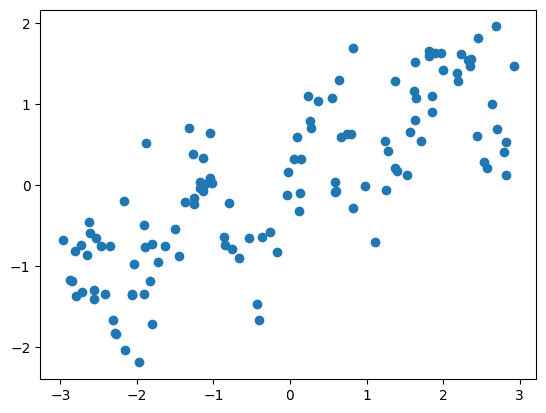

In [49]:
import matplotlib.pyplot as plt
plt.scatter(X, y)

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X, y)
y_pred = lr.predict(X)
y_pred

array([-0.27158434,  1.26279213,  0.68033046,  0.32525244, -0.85351636,
       -0.8535806 , -1.11432153,  1.0376634 ,  0.33179428,  0.61662684,
       -1.21418328,  1.31391068,  0.94782963, -0.70353255, -0.78479301,
       -0.78058662, -0.45879058,  0.12844812, -0.11871264, -0.49344503,
        0.36038972, -0.89752256, -0.49100699, -0.29336343, -0.05446682,
        0.82195645, -0.73726086,  0.1004276 ,  0.30862463, -1.14530123,
        0.34891722, -0.81488764, -1.0957655 ,  1.25792204,  1.30251867,
        0.88379599, -0.45780119, -1.00889566,  0.5531411 , -0.09685578,
       -0.94400764,  0.04967659, -1.17742257,  1.15255839, -0.57985853,
        0.49532447, -0.43890076,  0.11596268,  0.18691215, -0.77672536,
        1.3130446 ,  0.79521114,  1.23292513,  1.11396278,  0.32323251,
        1.18598979, -1.03334135, -0.74708993, -1.14855846, -0.4026321 ,
       -0.23393645, -0.54638661,  0.93796271, -0.31895132, -0.52086007,
        0.17622218, -0.89371344,  0.86728415, -1.07046912,  1.35

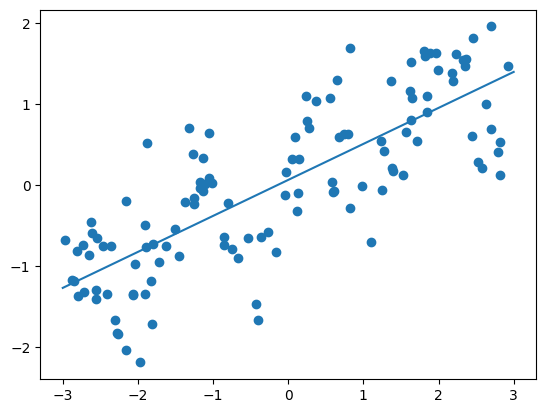

In [54]:
import numpy as np
plt.scatter(X, y)
X_test = np.linspace(-3, 3, 100)
plt.plot(X_test, lr.predict(X_test.reshape(-1, 1)))

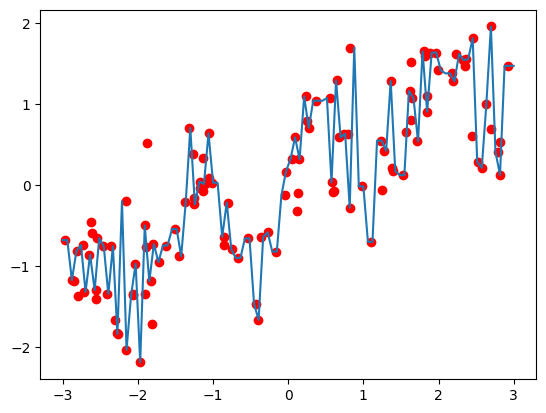

In [61]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(X, y)
X_pred = dtr.predict(X_test.reshape(-1, 1))

plt.scatter(X, y, c="red")
plt.plot(X_test, X_pred)

### Binning, Discretization, Linear Models, and Trees

### 🎯 비닝(Binning): 연속 특성을 구간으로 나누기

**실전 상황:**
연속적인 특성(예: 나이, 소득)을 가진 데이터에서 선형 모델의 성능이 낮습니다.
비선형 패턴을 포착하지 못하기 때문입니다.

**비닝의 아이디어:**
연속 값을 **구간(bin)**으로 나누어 범주형처럼 취급
```
연속: [0.0, 0.5, 1.2, 2.3, 3.1]
비닝: [구간0, 구간0, 구간1, 구간2, 구간3]
```

**왜 비닝을 사용하는가:**
1. 선형 모델에 **비선형성** 부여
2. **이상치 영향** 감소
3. 해석 가능성 향상 (예: "고소득" vs "저소득")

**trade-off:**
- ✅ 비선형 패턴 학습 가능
- ⚠️ 정보 손실 (같은 구간 내 차이 무시)
- ⚠️ 구간 개수(n_bins) 선택이 중요

**이 섹션에서:**
같은 데이터에서 선형 모델과 트리 모델의 동작 차이를 비교합니다.

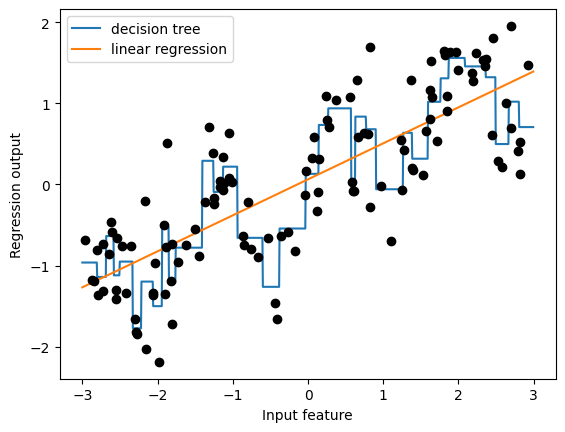

In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

X, y = mglearn.datasets.make_wave(n_samples=120)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

reg = DecisionTreeRegressor(min_samples_leaf=3).fit(X, y)
plt.plot(line, reg.predict(line), label="decision tree")

reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line), label="linear regression")

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

### 📊 결과 분석: 선형 회귀 vs 결정 트리

**그래프가 보여주는 것:**
- **파란색 (Decision Tree)**: 계단 형태 → 구간별 평균값 예측
- **주황색 (Linear Regression)**: 직선 → 전체 데이터에 하나의 직선 피팅

**핵심 관찰:**
- 데이터는 명확한 비선형 패턴을 보임
- 선형 회귀는 이 패턴을 포착하지 못함
- 결정 트리는 데이터를 구간별로 분할하여 더 잘 적합

**질문:**
선형 모델도 트리처럼 구간별로 다른 예측을 할 수 있을까요?
→ 비닝(binning)으로 가능합니다!

In [63]:
from sklearn.preprocessing import KBinsDiscretizer

In [68]:
kb = KBinsDiscretizer(n_bins=10, strategy='uniform')
kb.fit(X)
print("bin edges: \n", kb.bin_edges_)

bin edges: 
 [array([-2.9668673 , -2.37804841, -1.78922951, -1.20041062, -0.61159173,
        -0.02277284,  0.56604605,  1.15486494,  1.74368384,  2.33250273,
         2.92132162])                                                   ]


In [69]:
X_binned = kb.transform(X)
X_binned

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 120 stored elements and shape (120, 10)>

In [70]:
print(X[:10])
X_binned.toarray()[:10]

[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]
 [-2.06403288]
 [-2.65149833]
 [ 2.19705687]
 [ 0.60669007]
 [ 1.24843547]]


array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

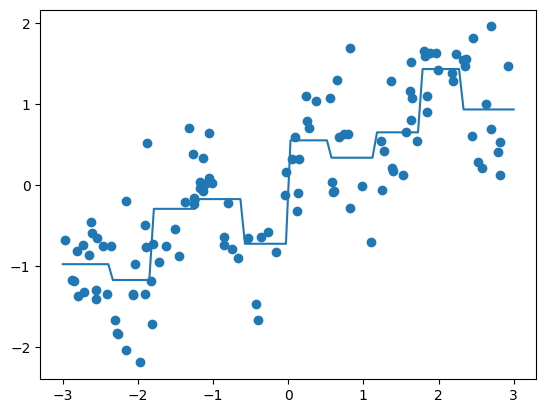

In [83]:
lr.fit(X_binned, y)
lr.predict(X_binned)
plt.scatter(X, y)
plt.plot(X_test, lr.predict(kb.transform(X_test.reshape(-1, 1))))

In [84]:
kb = KBinsDiscretizer(n_bins=10, strategy='uniform', encode='onehot-dense')
kb.fit(X)
X_binned = kb.transform(X)

Text(0.5, 0, 'Input feature')

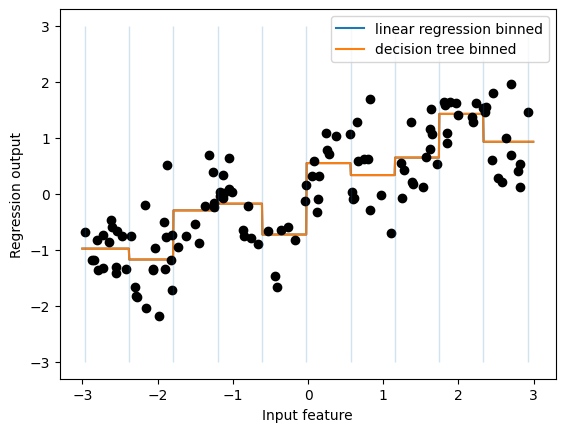

In [85]:
line_binned = kb.transform(line)

reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='linear regression binned')

reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='decision tree binned')
plt.plot(X[:, 0], y, 'o', c='k')
plt.vlines(kb.bin_edges_[0], -3, 3, linewidth=1, alpha=.2)
plt.legend(loc="best")
plt.ylabel("Regression output")
plt.xlabel("Input feature")

### 📊 결과 분석: 비닝된 특성의 효과

**그래프가 보여주는 것:**
- **세로 점선**: 구간 경계
- **선형 회귀 (비닝 후)**: 구간마다 다른 상수 값 → 계단 형태
- **결정 트리 (비닝 후)**: 거의 동일한 형태

**왜 선형 회귀가 계단 형태가 되었나:**
비닝 + One-Hot 인코딩 후:
```
원본: X = 0.7
비닝: [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]  ← 구간 2에 속함
예측: y = w₀ + w₂×1 = w₀ + w₂  ← 구간 2의 가중치
```
각 구간이 독립 특성이 되어, 구간별로 다른 예측값 가능!

**비교:**
| 조건 | 선형 회귀 | 결정 트리 |
|------|----------|----------|
| 원본 특성 | 직선 하나 | 계단 (세밀) |
| 비닝된 특성 | 계단 (동일 구간) | 계단 (동일 구간) |

**실무 팁:**
- 구간 개수 증가 → 더 세밀한 표현 (과적합 주의)
- `strategy='quantile'`: 각 구간에 같은 수의 데이터
- `strategy='uniform'`: 동일한 너비의 구간

### Interactions and Polynomials

### 🎯 상호작용과 다항식 특성: 선형 모델에 비선형성 부여

**실전 상황:**
비닝만으로는 각 구간 내에서 기울기가 없어(flat) 세밀한 예측이 어렵습니다.
구간 내에서도 원래 값에 따른 변화를 표현하고 싶습니다.

**해결 방향:**
1. **상호작용 특성**: 원본 특성 × 비닝 특성 → 구간별로 다른 기울기
2. **다항식 특성**: x, x², x³, ... → 곡선 형태 학습

**상호작용 특성 예:**
```
원본:        X = 0.7 (구간 2에 속함)
비닝:        [0, 0, 1, 0, ...]
상호작용:    [0×0.7, 0×0.7, 1×0.7, 0×0.7, ...] = [0, 0, 0.7, 0, ...]
```
→ 구간 2 내에서 원본 값에 비례하는 가중치 적용 가능

**이 섹션에서 다룰 내용:**
1. 원본 + 비닝 결합
2. 비닝 × 원본 상호작용
3. 다항식 특성
4. 모델별 효과 비교

In [86]:
X_combined = np.hstack([X, X_binned])
print(X_combined.shape)

(120, 11)


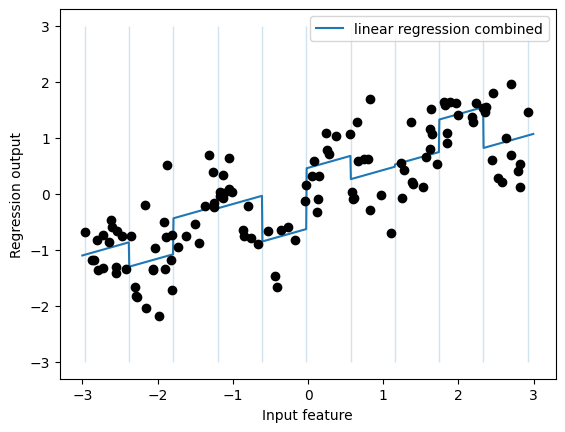

In [87]:
reg = LinearRegression().fit(X_combined, y)

line_combined = np.hstack([line, line_binned])
plt.plot(line, reg.predict(line_combined), label='linear regression combined')

plt.vlines(kb.bin_edges_[0], -3, 3, linewidth=1, alpha=.2)
plt.legend(loc="best")
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.plot(X[:, 0], y, 'o', c='k')

In [88]:
X_product = np.hstack([X_binned, X * X_binned])
print(X_product.shape)

(120, 20)


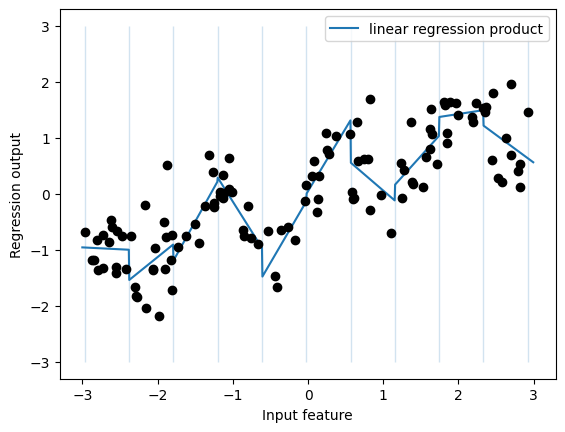

In [89]:
reg = LinearRegression().fit(X_product, y)

line_product = np.hstack([line_binned, line * line_binned])
plt.plot(line, reg.predict(line_product), label='linear regression product')

plt.vlines(kb.bin_edges_[0], -3, 3, linewidth=1, alpha=.2)

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

### 📊 결과 분석: 비닝 × 원본 상호작용

**그래프가 보여주는 것:**
- 각 구간 내에서 **기울기가 있는 직선**
- 전체적으로 **조각별 선형(piecewise linear)** 형태

**이전 비닝만 사용했을 때와 비교:**
| 방법 | 구간 내 형태 | 유연성 |
|------|------------|--------|
| 비닝만 | 수평선 (상수) | 낮음 |
| 비닝 × 원본 | 기울기 있는 선 | 높음 |

**왜 이런 형태가 되는가:**
```
예측 = Σ(구간_i × w_i + 구간_i × X × v_i)
     = 해당 구간의 (절편 + 기울기 × X)
```
각 구간마다 독립적인 절편(w)과 기울기(v)를 학습!

**실무 적용:**
- 나이에 따른 소득: 20대, 30대, 40대에서 다른 증가율
- 경력에 따른 연봉: 구간별로 다른 상승 곡선

In [90]:
from sklearn.preprocessing import PolynomialFeatures

# include polynomials up to x ** 10:
# the default "include_bias=True" adds a feature that's constantly 1
poly = PolynomialFeatures(degree=10, include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)

In [91]:
print("X_poly.shape: {}".format(X_poly.shape))

X_poly.shape: (120, 10)


In [92]:
print("Entries of X:\n{}".format(X[:5]))
print("Entries of X_poly:\n{}".format(X_poly[:5]))

Entries of X:
[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]
Entries of X_poly:
[[-7.52759287e-01  5.66646544e-01 -4.26548448e-01  3.21088306e-01
  -2.41702204e-01  1.81943579e-01 -1.36959719e-01  1.03097700e-01
  -7.76077513e-02  5.84199555e-02]
 [ 2.70428584e+00  7.31316190e+00  1.97768801e+01  5.34823369e+01
   1.44631526e+02  3.91124988e+02  1.05771377e+03  2.86036036e+03
   7.73523202e+03  2.09182784e+04]
 [ 1.39196365e+00  1.93756281e+00  2.69701700e+00  3.75414962e+00
   5.22563982e+00  7.27390068e+00  1.01250053e+01  1.40936394e+01
   1.96178338e+01  2.73073115e+01]
 [ 5.91950905e-01  3.50405874e-01  2.07423074e-01  1.22784277e-01
   7.26822637e-02  4.30243318e-02  2.54682921e-02  1.50759786e-02
   8.92423917e-03  5.28271146e-03]
 [-2.06388816e+00  4.25963433e+00 -8.79140884e+00  1.81444846e+01
  -3.74481869e+01  7.72888694e+01 -1.59515582e+02  3.29222321e+02
  -6.79478050e+02  1.40236670e+03]]


In [93]:
print("Polynomial feature names:\n{}".format(poly.get_feature_names_out()))

Polynomial feature names:
['x0' 'x0^2' 'x0^3' 'x0^4' 'x0^5' 'x0^6' 'x0^7' 'x0^8' 'x0^9' 'x0^10']


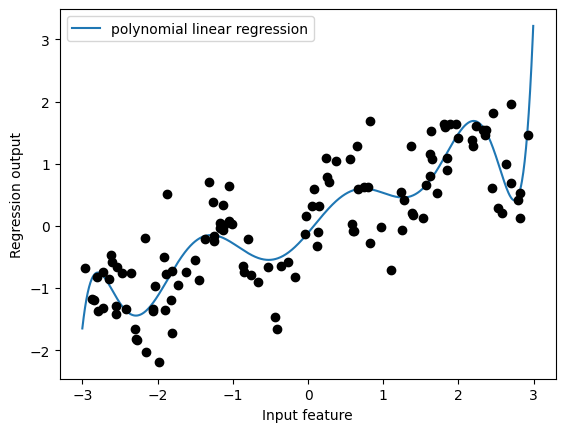

In [94]:
reg = LinearRegression().fit(X_poly, y)

line_poly = poly.transform(line)
plt.plot(line, reg.predict(line_poly), label='polynomial linear regression')
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

### 📊 결과 분석: 10차 다항식 회귀

**그래프가 보여주는 것:**
- 부드러운 곡선으로 데이터 패턴을 잘 포착
- 데이터 범위 내에서 좋은 적합도

**다항식 특성의 작동 방식:**
```
원본: X
10차: [X, X², X³, X⁴, X⁵, X⁶, X⁷, X⁸, X⁹, X¹⁰]

예측: y = w₁X + w₂X² + w₃X³ + ... + w₁₀X¹⁰
```

**장점:**
- 매끄러운 비선형 관계 표현
- 고차 다항식 = 더 복잡한 패턴

**주의사항:**
- ⚠️ 데이터 범위 밖에서 급격히 발산 (외삽 위험)
- ⚠️ 고차 다항식 → 과적합 가능성
- 💡 실무에서는 degree=2 또는 3이 일반적

**비교: SVM vs 다항식**
다음 셀에서 커널 기반 방법(SVM)과 비교합니다.

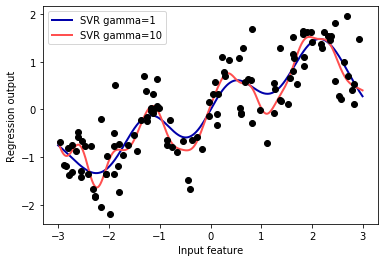

In [35]:
from sklearn.svm import SVR

for gamma in [1, 10]:
    svr = SVR(gamma=gamma).fit(X, y)
    plt.plot(line, svr.predict(line), label='SVR gamma={}'.format(gamma))

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

### 📊 결과 분석: SVM vs 다항식 회귀

**그래프가 보여주는 것:**
- **gamma=1**: 부드러운 곡선, 일반화 좋음
- **gamma=10**: 데이터에 더 밀착, 진동 가능성

**SVM의 장점:**
- 명시적인 다항식 특성 생성 불필요
- 커널 함수가 암묵적으로 고차원 공간에서 작동

**gamma 파라미터:**
- 낮은 gamma: 넓은 영향 범위, 부드러운 결정 경계
- 높은 gamma: 좁은 영향 범위, 복잡한 결정 경계

**언제 무엇을 사용할까:**
| 상황 | 권장 방법 |
|------|----------|
| 해석 가능성 중요 | 다항식 회귀 (계수 해석) |
| 성능 최적화 | SVM + 교차 검증으로 gamma 튜닝 |
| 대규모 데이터 | 다항식 + 선형 모델 (SVM은 느림) |

### 중요: Boston Housing 데이터셋 제거 안내

> **윤리적 문제로 인한 데이터셋 제거**
>
> scikit-learn 1.2 버전에서 `load_boston()` 함수가 **완전히 제거**되었습니다.
>
> **제거 이유**: 이 데이터셋에는 인종 차별적인 특성이 포함되어 있어 윤리적 문제가
> 제기되었습니다. 특히 'B' 변수(흑인 인구 비율)가 주택 가격 예측에 사용되는 것이
> 적절하지 않다는 비판이 있었습니다. scikit-learn 개발팀은 이러한 특성이 차별적
> 패턴을 영속화할 수 있다고 판단하여 데이터셋을 제거했습니다.
>
> **대안 데이터셋**:
> - `mglearn.datasets.load_boston()`: 학습 목적으로 동일한 데이터 제공
> - `fetch_california_housing()`: 윤리적 문제가 없는 캘리포니아 주택 가격 데이터
> - `fetch_openml(name='house_prices')`: Ames Housing - 더 현대적인 주택 데이터
>
> 이 노트북에서는 기존 코드와의 호환성을 위해 `mglearn`의 래퍼 함수를 사용합니다.
> 새로운 프로젝트에서는 윤리적 문제가 없는 대안 데이터셋 사용을 권장합니다.
>
> 📚 [관련 GitHub 논의](https://github.com/scikit-learn/scikit-learn/issues/16155)

In [36]:
from mglearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(
    boston.data, boston.target, random_state=0)

# rescale data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [37]:
poly = PolynomialFeatures(degree=2).fit(X_train_scaled)
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_poly.shape: {}".format(X_train_poly.shape))

X_train.shape: (379, 13)
X_train_poly.shape: (379, 105)


In [38]:
print("Polynomial feature names:\n{}".format(poly.get_feature_names_out()))

Polynomial feature names:
['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x9^2', 'x9 x10', 'x9 x11', 'x9 x12', 'x10^2', 'x10 x11', 'x10 x12', 'x11^2', 'x11 x12', 'x12^2']


In [39]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train_scaled, y_train)
print("Score without interactions: {:.3f}".format(
    ridge.score(X_test_scaled, y_test)))
ridge = Ridge().fit(X_train_poly, y_train)
print("Score with interactions: {:.3f}".format(
    ridge.score(X_test_poly, y_test)))

Score without interactions: 0.621
Score with interactions: 0.753


### 📊 결과 분석: 다항식 특성 + Ridge 회귀

**점수 비교:**
- 상호작용 없이: 낮은 R² 점수
- 상호작용 포함: 높은 R² 점수 (향상!)

**왜 성능이 향상되었나:**
- 원래 13개 특성 → 다항식 변환 후 105개 특성
- 특성 간 **상호작용**과 **제곱항** 포함
- 예: "방 개수 × 범죄율", "방 개수²" 등

**Ridge가 필요한 이유:**
- 특성 수 증가 → 과적합 위험 증가
- Ridge의 L2 정규화가 계수 크기 제한
- 다중공선성 문제 완화 (X와 X²는 상관관계 높음)

**실무 팁:**
```python
from sklearn.pipeline import make_pipeline
model = make_pipeline(
    PolynomialFeatures(degree=2),
    StandardScaler(),  # 정규화 전 스케일링 권장
    Ridge(alpha=1.0)
)
```

In [40]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100).fit(X_train_scaled, y_train)
print("Score without interactions: {:.3f}".format(
    rf.score(X_test_scaled, y_test)))
rf = RandomForestRegressor(n_estimators=100).fit(X_train_poly, y_train)
print("Score with interactions: {:.3f}".format(rf.score(X_test_poly, y_test)))

Score without interactions: 0.808
Score with interactions: 0.789


### 📊 결과 분석: RandomForest와 다항식 특성

**주목할 점:**
- RandomForest는 다항식 특성 추가로 성능 **향상 없음** (또는 미미)

**왜 트리 모델에는 효과가 없나:**
트리 모델은 이미 특성 간 상호작용을 **자동으로 학습**합니다.
```
if 방개수 > 5:
    if 범죄율 < 0.1:
        예측 = 높은 가격
```
→ "방 개수 × 범죄율" 상호작용을 명시적 특성 없이 포착

**선형 모델 vs 트리 모델:**
| 특성 | 선형 모델 | 트리 모델 |
|------|----------|----------|
| 상호작용 학습 | ❌ 명시적 특성 필요 | ✅ 자동 |
| 다항식 특성 효과 | 크게 향상 | 거의 없음 |
| 해석 가능성 | 계수로 해석 | 특성 중요도 |

**핵심 교훈:**
```
모든 특성 공학이 모든 모델에 효과적인 것은 아닙니다.
모델의 특성을 이해하고, 필요한 변환만 적용하세요.
```

### Univariate Nonlinear Transformations

### 🎯 단변량 비선형 변환: 치우친 분포 다루기

**실전 상황:**
데이터의 특성 분포가 심하게 치우쳐(skewed) 있습니다.
예: 웹사이트 방문 횟수, 구매 금액, 센서 카운트

**문제점:**
1. 선형 모델이 이상치에 민감
2. 특성 값 범위가 너무 넓음
3. 정규 분포 가정 위반

**해결책 - log 변환:**
```python
X_log = np.log(X + 1)  # +1은 log(0) 방지
```

**log 변환의 효과:**
- 큰 값 압축, 작은 값 확대
- 치우친 분포 → 정규 분포에 가깝게
- 승법적 관계 → 가법적 관계로 변환

**언제 사용하나:**
- ✅ 카운트 데이터 (조회수, 클릭수)
- ✅ 금액 데이터 (가격, 매출)
- ✅ 포아송 분포 유사 데이터
- ⚠️ 이미 정규 분포인 데이터에는 불필요

In [41]:
rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000, 3))
w = rnd.normal(size=3)

X = rnd.poisson(10 * np.exp(X_org))
y = np.dot(X_org, w)

In [42]:
print("Number of feature appearances:\n{}".format(np.bincount(X[:, 0])))

Number of feature appearances:
[28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9
 17  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5
  2  1  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1
  0  2  0  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0
  0  0  0  0  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0
  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


Text(0.5, 0, 'Value')

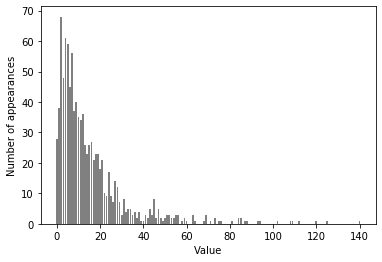

In [43]:
bins = np.bincount(X[:, 0])
plt.bar(range(len(bins)), bins, color='grey')
plt.ylabel("Number of appearances")
plt.xlabel("Value")

### 📊 결과 분석: 원본 데이터 분포

**히스토그램이 보여주는 것:**
- **오른쪽 꼬리가 긴** 분포 (right-skewed)
- 대부분의 값이 낮은 범위에 집중
- 소수의 매우 큰 값(이상치)

**왜 이런 분포가 문제인가:**
1. **선형 모델**: 극단값이 회귀선에 과도한 영향
2. **거리 기반 모델** (KNN, SVM): 스케일 불균형
3. **경사하강법**: 수렴 속도 저하

**포아송 분포의 특성:**
이 데이터는 `exp(정규분포)` 형태로 생성됨
→ log 변환으로 원래 정규 분포 복원 가능

In [44]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
score = Ridge().fit(X_train, y_train).score(X_test, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.622


In [45]:
X_train_log = np.log(X_train + 1)
X_test_log = np.log(X_test + 1)

Text(0.5, 0, 'Value')

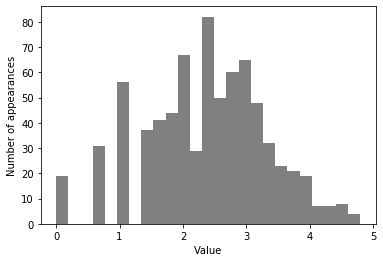

In [46]:
plt.hist(X_train_log[:, 0], bins=25, color='gray')
plt.ylabel("Number of appearances")
plt.xlabel("Value")

### 📊 결과 분석: log 변환 후 분포

**변환 후 히스토그램:**
- **종 모양**에 가까운 분포
- 극단적인 값이 줄어듦
- 값의 범위가 압축됨

**log(X + 1) 변환:**
```
원본값     → log값
0          → 0
1          → 0.69
10         → 2.40
100        → 4.62
1000       → 6.91
```
→ 1000배 차이가 ~7배 차이로 압축

**+1을 더하는 이유:**
- log(0)은 정의되지 않음
- 0을 포함한 데이터 처리 가능

In [47]:
score = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.875


### 📊 결과 분석: log 변환의 성능 향상

**점수 비교:**
- 원본 데이터 Ridge: 낮은 R²
- log 변환 후 Ridge: **높은 R²** (극적인 향상!)

**왜 이렇게 큰 차이가 나는가:**
1. **데이터 생성 방식**: y = w·X_org (X_org는 정규분포)
2. **관측된 X**: X = exp(X_org)의 포아송 근사
3. **log 변환**: log(X) ≈ X_org 복원
4. **선형 관계 회복**: y와 log(X) 사이에 선형 관계

**실무 진단 방법:**
```python
# 변환 전후 분포 비교
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 2)
axes[0].hist(X.ravel(), bins=50)
axes[0].set_title('Original')
axes[1].hist(np.log(X + 1).ravel(), bins=50)
axes[1].set_title('Log-transformed')
```

**다른 변환 옵션:**
- `sqrt(X)`: 덜 강한 압축
- `Box-Cox`: 최적 변환 자동 찾기
- `QuantileTransformer`: 균등/정규 분포로 강제 변환

### Automatic Feature Selection
#### Univariate statistics

In [48]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

# get deterministic random numbers
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))
# add noise features to the data
# the first 30 features are from the dataset, the next 50 are noise
X_w_noise = np.hstack([cancer.data, noise])

X_train, X_test, y_train, y_test = train_test_split(
    X_w_noise, cancer.target, random_state=0, test_size=.5)
# use f_classif (the default) and SelectPercentile to select 50% of features
select = SelectPercentile(percentile=50)
select.fit(X_train, y_train)
# transform training set
X_train_selected = select.transform(X_train)

print("X_train.shape: {}".format(X_train.shape))
print("X_train_selected.shape: {}".format(X_train_selected.shape))

X_train.shape: (284, 80)
X_train_selected.shape: (284, 40)


[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


([], <a list of 0 Text yticklabel objects>)

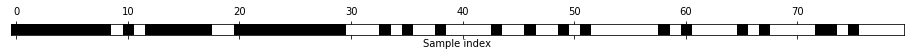

In [49]:
mask = select.get_support()
print(mask)
# visualize the mask. black is True, white is False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")
plt.yticks(())

In [50]:
from sklearn.linear_model import LogisticRegression

# transform test data
X_test_selected = select.transform(X_test)

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
print("Score with all features: {:.3f}".format(lr.score(X_test, y_test)))
lr.fit(X_train_selected, y_train)
print("Score with only selected features: {:.3f}".format(
    lr.score(X_test_selected, y_test)))

Score with all features: 0.940
Score with only selected features: 0.940


c:\users\t3kci\checkout\scikit-learn\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\t3kci\checkout\scikit-learn\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  ex

#### Model-based Feature Selection

In [51]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
select = SelectFromModel(
    RandomForestClassifier(n_estimators=100, random_state=42),
    threshold="median")

In [52]:
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_l1.shape: {}".format(X_train_l1.shape))

X_train.shape: (284, 80)
X_train_l1.shape: (284, 40)


([], <a list of 0 Text yticklabel objects>)

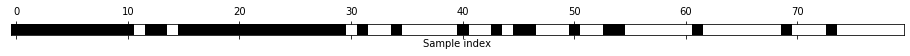

In [53]:
mask = select.get_support()
# visualize the mask. black is True, white is False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")
plt.yticks(())

In [54]:
X_test_l1 = select.transform(X_test)
score = LogisticRegression(max_iter=1000).fit(X_train_l1, y_train).score(X_test_l1, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.954


c:\users\t3kci\checkout\scikit-learn\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


#### Iterative feature selection

([], <a list of 0 Text yticklabel objects>)

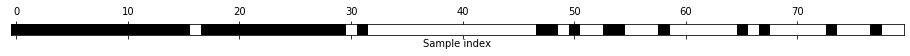

In [55]:
from sklearn.feature_selection import RFE
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42),
             n_features_to_select=40)

select.fit(X_train, y_train)
# visualize the selected features:
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")
plt.yticks(())

In [56]:
X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)

score = LogisticRegression(max_iter=1000).fit(X_train_rfe, y_train).score(X_test_rfe, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.951


c:\users\t3kci\checkout\scikit-learn\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [57]:
print("Test score: {:.3f}".format(select.score(X_test, y_test)))

Test score: 0.951


### Utilizing Expert Knowledge

### 🎯 도메인 지식 활용: 특성 공학의 핵심

**실전 상황:**
뉴욕 시티바이크 대여소의 자전거 대여량을 예측해야 합니다. 시간대별 대여 패턴을 분석하여 자전거 재배치 계획을 수립하려 합니다.

**핵심 질문:**
원시 데이터(타임스탬프)를 그대로 사용할 것인가, 아니면 의미 있는 특성으로 변환할 것인가?

**이 섹션에서 배울 내용:**
1. **단순 접근의 한계**: POSIX 타임스탬프를 직접 사용하면 왜 실패하는가
2. **점진적 개선**: 시간 → 요일+시간 → One-Hot 인코딩 → 상호작용 특성
3. **모델 선택과 특성 표현의 상호작용**: 같은 특성도 모델에 따라 다르게 작동

**실무 인사이트:**
- ✅ 도메인 지식은 알고리즘 선택보다 중요할 수 있음
- ✅ "무엇을 예측할 것인가"보다 "어떻게 표현할 것인가"가 성능을 결정
- ⚠️ 과도한 특성 공학은 과적합 위험 증가

In [58]:
citibike = mglearn.datasets.load_citibike()

In [59]:
print("Citi Bike data:\n{}".format(citibike.head()))

Citi Bike data:
starttime
2015-08-01 00:00:00     3
2015-08-01 03:00:00     0
2015-08-01 06:00:00     9
2015-08-01 09:00:00    41
2015-08-01 12:00:00    39
Freq: 3H, Name: one, dtype: int64


Text(0, 0.5, 'Rentals')

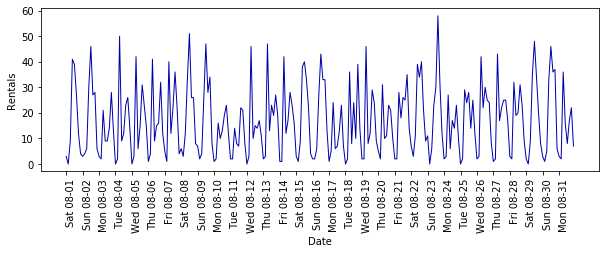

In [60]:
plt.figure(figsize=(10, 3))
xticks = pd.date_range(start=citibike.index.min(), end=citibike.index.max(),
                       freq='D')
plt.xticks(xticks, xticks.strftime("%a %m-%d"), rotation=90, ha="left")
plt.plot(citibike, linewidth=1)
plt.xlabel("Date")
plt.ylabel("Rentals")

### 📊 결과 분석: 자전거 대여 패턴

**그래프가 보여주는 것:**
- **일별 패턴**: 매일 비슷한 주기가 반복됨 (출퇴근 시간대 피크)
- **주간 패턴**: 평일과 주말의 차이가 있음
- **시간대별 피크**: 아침(출근)과 저녁(퇴근) 시간에 대여량 급증

**왜 이 패턴이 중요한가:**
이 규칙적인 패턴을 모델이 "학습"하려면, 데이터를 적절한 형태로 표현해야 합니다.
단순 시간 정보(POSIX timestamp)는 이 패턴을 모델에 전달하기 어렵습니다.

**다음 단계:**
POSIX 시간 → 시간/요일 특성 → 범주형 인코딩 순으로 표현을 개선해 나갑니다.

In [61]:
# extract the target values (number of rentals)
y = citibike.values
# convert to POSIX time by dividing by 10**9
X = citibike.index.astype("int64").values.reshape(-1, 1) // 10**9

In [62]:
# use the first 184 data points for training, the rest for testing
n_train = 184

# function to evaluate and plot a regressor on a given feature set
def eval_on_features(features, target, regressor):
    # split the given features into a training and a test set
    X_train, X_test = features[:n_train], features[n_train:]
    # also split the target array
    y_train, y_test = target[:n_train], target[n_train:]
    regressor.fit(X_train, y_train)
    print("Test-set R^2: {:.2f}".format(regressor.score(X_test, y_test)))
    y_pred = regressor.predict(X_test)
    y_pred_train = regressor.predict(X_train)
    plt.figure(figsize=(10, 3))

    plt.xticks(range(0, len(X), 8), xticks.strftime("%a %m-%d"), rotation=90,
               ha="left")

    plt.plot(range(n_train), y_train, label="train")
    plt.plot(range(n_train, len(y_test) + n_train), y_test, '-', label="test")
    plt.plot(range(n_train), y_pred_train, '--', label="prediction train")

    plt.plot(range(n_train, len(y_test) + n_train), y_pred, '--',
             label="prediction test")
    plt.legend(loc=(1.01, 0))
    plt.xlabel("Date")
    plt.ylabel("Rentals")

Test-set R^2: -0.04


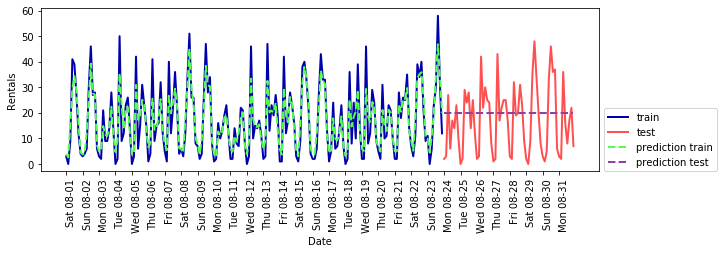

In [63]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
eval_on_features(X, y, regressor)

### 📊 결과 분석: POSIX 타임스탬프의 실패

**R² = 음수 또는 매우 낮음 - 왜 이런 결과가?**

**근본적 문제:**
- POSIX 시간은 1970년 1월 1일부터의 **누적 초(seconds)** 값
- 훈련 데이터: 예) `1470000000` ~ `1471000000` 범위
- 테스트 데이터: 예) `1471000000` ~ `1472000000` 범위 (훈련에서 본 적 없는 값!)

**RandomForest의 한계:**
트리 기반 모델은 **외삽(extrapolation)을 할 수 없음**
- 훈련 시 본 적 없는 값에 대해서는 가장 가까운 리프 노드의 평균값 반환
- 미래의 POSIX 값은 과거 데이터로 예측 불가

**핵심 교훈:**
```
❌ 모델이 나쁜 것이 아니라
✅ 특성 표현이 잘못된 것
```

시간의 **절대값**이 아닌 **주기적 패턴**을 표현해야 합니다.

Test-set R^2: 0.60


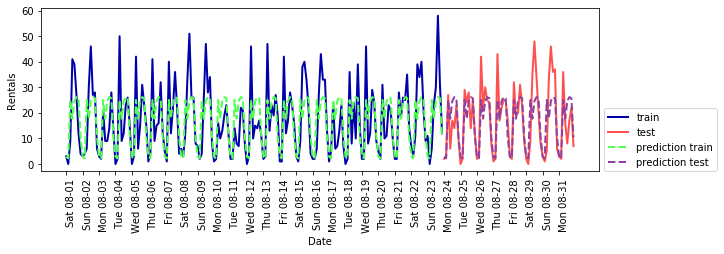

In [64]:
X_hour = citibike.index.hour.values.reshape(-1, 1)
eval_on_features(X_hour, y, regressor)

### 📊 결과 분석: 시간(hour) 특성

**R² 점수 향상!**

**왜 개선되었나:**
- 시간(0-23)은 매일 반복되는 값 → 테스트 데이터에서도 동일한 값 존재
- 출퇴근 시간대(8시, 18시)의 패턴을 학습 가능

**아직 부족한 점:**
- 평일 8시 vs 주말 8시의 차이를 구분하지 못함
- 월요일 아침과 금요일 저녁의 특수 패턴 미반영

**다음 개선 방향:**
요일(dayofweek) 정보를 추가하여 평일/주말 패턴을 구분합니다.

Test-set R^2: 0.84


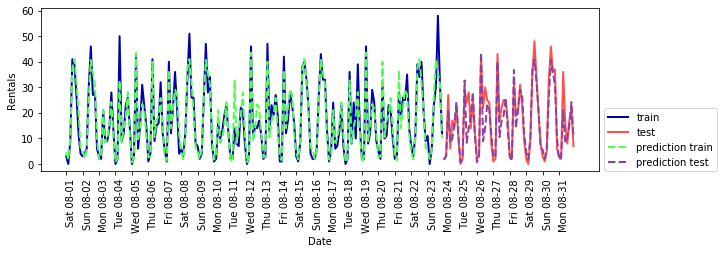

In [65]:
X_hour_week = np.hstack([citibike.index.dayofweek.values.reshape(-1, 1),
                         citibike.index.hour.values.reshape(-1, 1)])
eval_on_features(X_hour_week, y, regressor)

### 📊 결과 분석: 요일 + 시간 특성 (RandomForest)

**R² 추가 향상!**

**RandomForest가 잘 작동하는 이유:**
- 트리는 특성 조합을 자연스럽게 학습 (예: "요일=1 AND 시간=8" → 높은 대여량)
- 평일과 주말의 다른 패턴을 자동으로 분기

**질문:**
같은 특성을 선형 모델에 사용하면 어떨까요?

Test-set R^2: 0.13


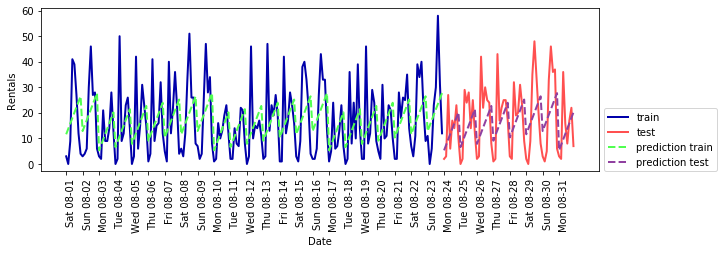

In [66]:
from sklearn.linear_model import LinearRegression
eval_on_features(X_hour_week, y, LinearRegression())

### 📊 결과 분석: 선형 회귀의 낮은 성능

**R² 급락! 같은 특성인데 왜?**

**선형 모델의 제약:**
```
y = w₀ + w₁×(요일) + w₂×(시간)
```
- 요일과 시간을 **독립적으로** 처리
- "화요일 8시"와 "화요일 + 8시"는 같은 결과
- 요일과 시간의 **상호작용**을 학습할 수 없음

**트리 vs 선형 모델:**
| 모델 | 특성 조합 학습 | 필요한 특성 형태 |
|------|---------------|-----------------|
| RandomForest | 자동 (분기) | 숫자형 OK |
| LinearRegression | 불가 | 상호작용 특성 필요 |

**해결책:**
One-Hot 인코딩으로 각 시간대를 개별 특성으로 만들기

In [67]:
enc = OneHotEncoder()
X_hour_week_onehot = enc.fit_transform(X_hour_week).toarray()

Test-set R^2: 0.62


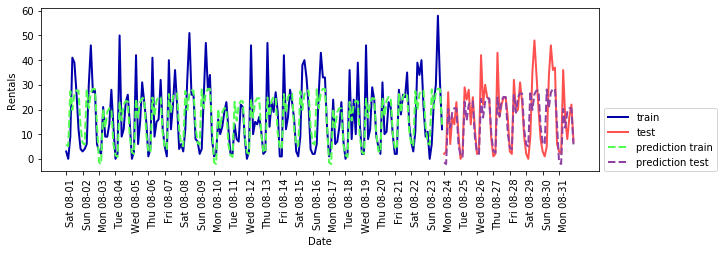

In [68]:
eval_on_features(X_hour_week_onehot, y, Ridge())

### 📊 결과 분석: One-Hot 인코딩 + Ridge

**R² 대폭 향상!**

**One-Hot 인코딩이 해결한 문제:**
```
[요일=0, 시간=8] → [월, 화, 수, ..., 00:00, 03:00, ..., 21:00]
                   [1,  0,  0, ...,   0,     0,    ...,    0]
```
- 각 요일과 시간대가 **개별 특성**이 됨
- 모델은 "월요일"과 "8시"에 대해 독립적인 가중치 학습

**아직 남은 한계:**
- "월요일 8시"의 **특별한 효과**는 여전히 학습 불가
- 월요일 계수 + 8시 계수 = 월요일 8시 예측값

**다음 단계:**
다항식 상호작용으로 "월요일 × 8시" 특성 생성

Test-set R^2: 0.85


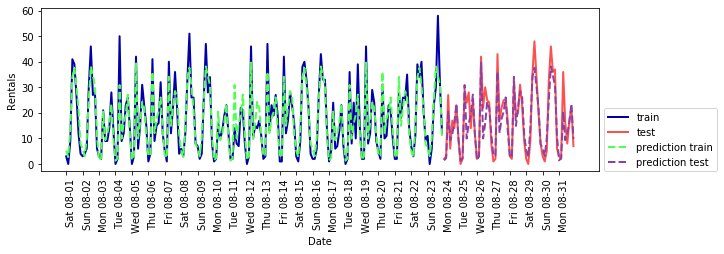

In [69]:
poly_transformer = PolynomialFeatures(degree=2, interaction_only=True,
                                      include_bias=False)
X_hour_week_onehot_poly = poly_transformer.fit_transform(X_hour_week_onehot)
lr = Ridge()
eval_on_features(X_hour_week_onehot_poly, y, lr)

### 📊 결과 분석: 다항식 상호작용 특성

**R² 최고 점수!**

**상호작용 특성이 추가한 것:**
```
기존: [월, 화, ..., 00:00, 03:00, ...]
추가: [월×00:00, 월×03:00, ..., 화×00:00, ...]
```

**왜 성능이 향상되었나:**
- "월요일 아침"과 "토요일 아침"에 다른 가중치 부여 가능
- 평일 출근 시간 vs 주말 늦은 아침의 패턴 구분

**특성 수 증가:**
- 요일: 7개
- 시간: 8개 (3시간 간격)
- 상호작용: 7 × 8 = 56개
- 총: 7 + 8 + 56 = 71개

**다음 셀:**
어떤 상호작용 특성이 가장 중요한지 계수를 시각화합니다.

In [70]:
hour = ["%02d:00" % i for i in range(0, 24, 3)]
day = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
features =  day + hour

In [71]:
features_poly = poly_transformer.get_feature_names_out(input_features=features)
features_nonzero = np.array(features_poly)[lr.coef_ != 0]
coef_nonzero = lr.coef_[lr.coef_ != 0]

Text(0, 0.5, 'Feature magnitude')

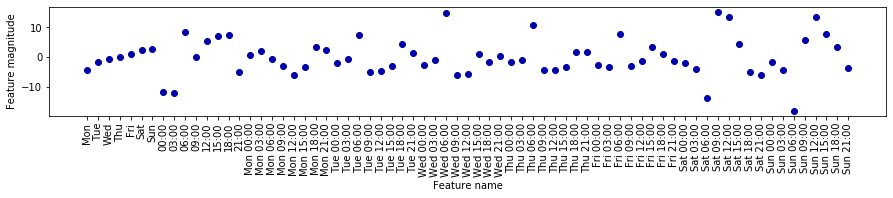

In [72]:
plt.figure(figsize=(15, 2))
plt.plot(coef_nonzero, 'o')
plt.xticks(np.arange(len(coef_nonzero)), features_nonzero, rotation=90)
plt.xlabel("Feature name")
plt.ylabel("Feature magnitude")

### 📊 결과 분석: 특성 계수 시각화

**그래프가 보여주는 것:**
- **양수 계수**: 해당 조합에서 대여량 증가 (예: 평일 출퇴근 시간)
- **음수 계수**: 해당 조합에서 대여량 감소 (예: 주말 이른 아침)

**주요 패턴 해석:**
- 평일(Mon-Fri) × 아침/저녁 시간: 높은 양수 계수 → 통근 수요
- 주말(Sat-Sun) × 낮 시간: 양수 계수 → 레저 수요
- 새벽 시간대: 전반적으로 음수 또는 0에 가까움

**실무 활용:**
- 자전거 재배치: 양수 계수가 큰 시간대 전에 자전거 확보
- 정비 일정: 음수 계수가 큰 시간대에 정비 작업 수행

**핵심 교훈:**
```
도메인 지식 + 적절한 특성 표현 = 강력한 예측 모델
```

단순한 타임스탬프가 아닌, 의미 있는 시간 패턴을 표현했을 때
선형 모델도 복잡한 트리 모델 못지않은 성능을 발휘합니다.

### Summary and Outlook

## 🚀 실무 권장 패턴: Pipeline 통합 워크플로우

지금까지 배운 전처리 기법들을 **하나의 파이프라인으로 통합**하는 현대적인 방법을 알아봅시다.

### 왜 Pipeline을 사용해야 하는가?

| 수동 단계별 처리 | Pipeline 통합 |
|-----------------|---------------|
| 코드가 길고 복잡 | 깔끔하고 재사용 가능 |
| 데이터 누수(data leakage) 위험 | 자동으로 방지 |
| 배포가 어려움 | `joblib.dump(model)`로 간단 배포 |
| 교차 검증 시 반복 코드 | `cross_val_score(model, X, y)` 한 줄 |

### 🎯 결측치 처리: SimpleImputer

**실전 상황:**
실제 데이터에는 거의 항상 결측치(NaN)가 존재합니다.
설문 무응답, 센서 오류, 시스템 장애 등 다양한 이유로 발생합니다.

**SimpleImputer 전략:**
- `mean`: 평균값으로 대체 (수치형 기본)
- `median`: 중앙값으로 대체 (이상치가 많을 때)
- `most_frequent`: 최빈값으로 대체 (범주형 기본)

**실무 팁:**
- ✅ 수치형은 `mean` 또는 `median`
- ✅ 범주형은 `most_frequent`
- ⚠️ 결측치가 30% 이상이면 해당 컬럼 제거 고려

### ⚠️ 프로덕션 필수: handle_unknown='ignore'

**문제 상황:**
학습 데이터에 없던 새로운 카테고리가 테스트/운영 데이터에 나타나면 에러 발생!

```python
# 학습: ['A', 'B', 'C'] 카테고리만 있었음
# 테스트: 'D' 라는 새로운 값 등장 → ValueError!
```

**해결책:**
```python
OneHotEncoder(handle_unknown='ignore', sparse_output=False)
```

- `handle_unknown='ignore'`: 새로운 값은 모든 원-핫 컬럼이 0
- `handle_unknown='error'` (기본값): 새로운 값이면 에러 발생

**실무 팁:**
- ✅ 프로덕션 코드에서는 항상 `handle_unknown='ignore'` 사용
- ⚠️ 새로운 카테고리가 많다면 모델 재학습 필요

In [ ]:
# 🚀 실무 권장 패턴: Pipeline 통합 워크플로우
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression

# 수치형 전처리 파이프라인
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# 범주형 전처리 파이프라인  
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# 컬럼별 전처리 통합
preprocessor = ColumnTransformer([
    ('num', numeric_transformer, ['age', 'hours-per-week']),
    ('cat', categorical_transformer, ['workclass', 'education', 'gender', 'occupation'])
])

# 전체 파이프라인 (전처리 + 모델)
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

# 학습 및 예측 (adult 데이터 사용)
model.fit(data_train, y_train)
print(f"훈련 정확도: {model.score(data_train, y_train):.3f}")
print(f"테스트 정확도: {model.score(data_test, y_test):.3f}")

### 🔧 자주 발생하는 에러와 해결책

**1. Dimension Error**
```
ValueError: Expected 2D array, got 1D array instead
```
해결: `df['col']` → `df[['col']]` (2차원으로 변환)

**2. KeyError**
```
KeyError: "['a, b'] not in index"
```
해결: `['a, b']` → `['a', 'b']` (컬럼을 개별로 분리)

**3. Unknown Category Error**
```
ValueError: Found unknown categories during transform
```
해결: `OneHotEncoder(handle_unknown='ignore')` 사용

**4. Typo 주의**
```python
# 틀림: strategy='meam'
# 맞음: strategy='mean'
```

### 📚 학습 요약: 수동 처리 vs Pipeline 통합

| 항목 | 수동 단계별 처리 (이 노트북) | Pipeline 통합 (실무 권장) |
|------|---------------------------|-------------------------|
| **결측치 처리** | ❌ 없음 | ✅ SimpleImputer |
| **미지값 처리** | ❌ handle_unknown 없음 | ✅ handle_unknown='ignore' |
| **코드 구조** | 단계별 분리 | 하나의 Pipeline 객체 |
| **배포** | 여러 객체 저장 필요 | `joblib.dump(model)` 한 번 |
| **교차 검증** | 수동 반복 | `cross_val_score(model, X, y)` |

**결론:**
- 📖 **학습 목적**: 이 노트북처럼 단계별로 이해
- 🚀 **실무 프로젝트**: Pipeline으로 통합하여 사용

---

> **참고 자료:**
> - [scikit-learn Pipeline 문서](https://scikit-learn.org/stable/modules/compose.html)
> - [ColumnTransformer 가이드](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html)